## Load Dataset

In [1]:
import os
pwd = os.getcwd()
print(pwd)

In [74]:
import pandas as pd
dataset = pd.read_csv("online_shoppers_intention.csv")


In [70]:
print(dataset.head)

<bound method NDFrame.head of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0            

## Task 1: Build a predictive classification model (ensuring optimal features and classifier). Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March. (50 points)
```
a. Fit a best Linear and non-linear classifier and explain the optimal features set and dimensions. Linear classifier aids explanaibility while non-linear classifier may enhance classification performance.
b. Show and explain the hyper-parameter fitting process.
c. You may verify your work with AutoML (but oly AutoML solution is NOT acceptable, you need to baseline). However, you need to explain the rationale behind your choice of classifier, parameters and features. 
```

In [75]:
dataset = pd.get_dummies(dataset, columns=["OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"])

In [76]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1


In [105]:
# Seperate train data and test data
train_data = dataset[dataset["Month"].isin(["Jun", "Jul","Aug","Sep","Oct","Nov","Dec"])] 
train_data=train_data.drop(columns = "Month")
test_data = dataset[dataset["Month"].isin(["Feb","Mar"])] 
test_data=test_data.drop(columns = "Month")

In [106]:
# Independent variables should exclude revenue
x_train = train_data[train_data.columns[~train_data.columns.isin(['Revenue'])]]
x_test = test_data[test_data.columns[~test_data.columns.isin(['Revenue'])]]

In [107]:
# Convert Revenue to 1 or 0: Dependent variable
import numpy as np
y_train = np.zeros(len(train_data["Revenue"]))
train_revenue = np.array(train_data["Revenue"])
for i in range(0,len(train_revenue)):
    if train_revenue[i] ==True:
        y_train[i] = 1
        
y_test = np.zeros(len(test_data["Revenue"]))
test_revenue = np.array(test_data["Revenue"])
for i in range(0,len(test_revenue)):
    if test_revenue[i] ==True:
        y_test[i] = 1

In [108]:
# How many "false" revenue and "true" revenue are there?
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0.0: 4834, 1.0: 1204})
Counter({0.0: 1896, 1.0: 195})


In [136]:
# Fit a logistic regression model
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression()
model_logreg.fit(x_train, y_train)

/Users/daisyhe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
# Predict
y_fit = model_logreg.predict(x_test)

In [113]:
# Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
print(f'Accuracy = {accuracy_score(y_test, y_fit)}')
print(f'F1 = {f1_score(y_test, y_fit,average = None)}')
print(f'Precision = {precision_score(y_test,y_fit,average=None)}')
print(f'Recall = {recall_score(y_test, y_fit,average = None)}')
# Display the confusion matrix
print('Confusion matrix =')
print(confusion_matrix(y_test,y_fit))

Accuracy = 0.9325681492109039
F1 = [0.96376253 0.51546392]
Precision = [0.93984962 0.78125   ]
Recall = [0.98892405 0.38461538]
Confusion matrix =
[[1875   21]
 [ 120   75]]


## Task 2: Generate user-bahavior clusters based on the purchasing behavior data for the complete dataset.  (25 points).
```
a. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
b.  Return plots and cluster images generated for the data.
c. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster. [E.g. which cluster represent New shoppers, vs brand conscious shoppers etc.]
```

In [173]:
# Check each feature's importance by checking their coefficiences
logreg_coef = model_logreg.coef_[0]
feature_num = list(range(0,len(logreg_coef)))
feature_name = list(x_train.columns)
feature_coef = pd.DataFrame({'num': feature_num, 'name':feature_name,'coef' : abs(logreg_coef)})
print(feature_coef.sort_values(by='coef', ascending = False))


    num            name      coef
7     7       ExitRates  2.336007
6     6     BounceRates  1.703703
20   20       Browser_3  0.963881
52   52  TrafficType_13  0.880082
29   29      Browser_12  0.764215
..  ...             ...       ...
26   26       Browser_9  0.000000
51   51  TrafficType_12  0.000000
9     9      SpecialDay  0.000000
48   48   TrafficType_9  0.000000
55   55  TrafficType_16  0.000000

[65 rows x 3 columns]
64     7
63     6
62    20
61    52
60    29
      ..
4     56
3     55
2     51
1     48
0     57
Name: coef, Length: 65, dtype: int64


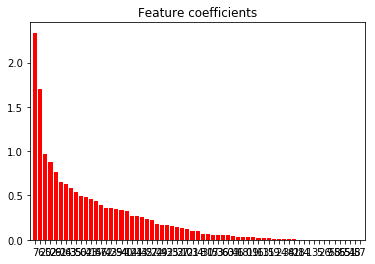

In [179]:
# Plot the impurity-based feature importances of the forest
import matplotlib.pyplot as plt
indices = np.argsort(feature_coef.coef)[::-1]
plt.figure()
plt.title("Feature coefficients")
plt.bar(range(x_train.shape[1]), feature_coef.coef[indices],
        color="r",  align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [210]:
# Extract the indices corresponding to a coefficient > 0.5
idx = feature_coef.coef[feature_coef.coef >= 0.5].index
# Extract the names of the associated feature columns
selected_columns = dataset.iloc[:,idx]
print(idx)
print(selected_columns)

Int64Index([6, 7, 20, 24, 29, 35, 52, 61, 63], dtype='int64')
       BounceRates  ExitRates  Browser_1  Browser_5  Browser_10  Region_3  \
0         0.200000   0.200000          1          0           0         0   
1         0.000000   0.100000          0          0           0         0   
2         0.200000   0.200000          1          0           0         0   
3         0.050000   0.140000          0          0           0         0   
4         0.020000   0.050000          0          0           0         0   
...            ...        ...        ...        ...         ...       ...   
12325     0.007143   0.029031          0          0           0         0   
12326     0.000000   0.021333          0          0           0         0   
12327     0.083333   0.086667          0          0           0         0   
12328     0.000000   0.021053          0          0           0         1   
12329     0.000000   0.066667          0          0           0         0   

       Traffi

In [211]:
from sklearn.decomposition import PCA
pca = PCA(5)
X_red = pca.fit_transform(selected_columns)
print(X_red.shape)

(12330, 5)


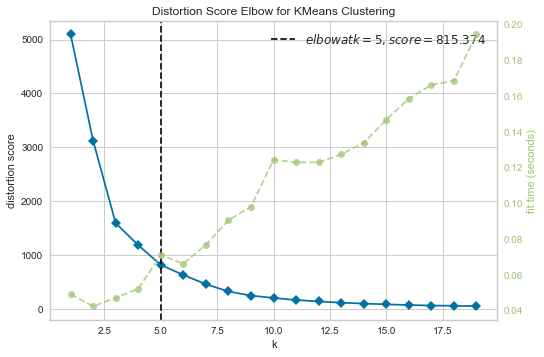

In [212]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,20))
# Fit the visualizer to the reduced features data
visualizer.fit(selected_columns)
visualizer.show() 

In [213]:
#Enter the optimal number of clusters here from the Elbow method: optimal number is 4
n = 5
# Instantiate the clustering model
clusters = KMeans(n)
# Assign the points in the reduced dataset to clusters
C_vals = np.array(clusters.fit_predict(selected_columns))

### END CODE HERE ###
print(np.unique(C_vals))

[0 1 2 3 4]


In [216]:
revenue = np.zeros(len(dataset["Revenue"]))
revenue_data = np.array(dataset["Revenue"])
for i in range(0,len(revenue_data)):
    if revenue_data[i] ==True:
        revenue[i] = 1

In [217]:
X_save = pd.DataFrame(dataset[list(selected_columns)])
X_save['Revenue'] = revenue
X_save['ClusterID'] = C_vals
X_save.head()

,BounceRates,ExitRates,Browser_1,Browser_5,Browser_10,Region_3,TrafficType_11,TrafficType_20,VisitorType_Other,Revenue,ClusterID
0,0.20,0.20,1,0,0,0,0,0,0,0.0,1
1,0.00,0.10,0,0,0,0,0,0,0,0.0,0
2,0.20,0.20,1,0,0,0,0,0,0,0.0,1
3,0.05,0.14,0,0,0,0,0,0,0,0.0,0
4,0.02,0.05,0,0,0,0,0,0,0,0.0,0


In [222]:
# Get all the values in the 'ClusterID' column
column_values = X_save.ClusterID
# Compute the unique cluster ID values
unique_values_a = column_values.unique()
# Sort the unique cluster ID values
unique_values = np.sort(unique_values_a)
print(unique_values)

[0 1 2 3 4]


In [227]:
# Initialize the percentages as arrays of zeros, with each zero representing a unique cluster ID
revenue_percentage = np.zeros(len(unique_values))
representation_percentage = np.zeros(len(unique_values))
# Loop through the clusters
for index, item in enumerate(unique_values):
    locations = X_save.loc[X_save['ClusterID'] == item]
    revenue = locations.loc[locations['Revenue'] == 1]
    representation_percentage[index] = len(locations)/len(X_save['ClusterID'])*100
    revenue_percentage[index] = len(revenue)/len(locations)*100

Representation Percentage= [61.73560422 15.78264396 14.50932685  4.18491484  3.78751014]
Revenue Percentage= [15.76458224 15.26207605 14.36556736 13.17829457 18.41541756]


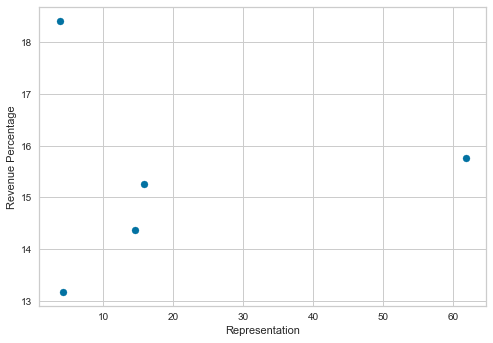

In [228]:
print('Representation Percentage=',(representation_percentage))
print('Revenue Percentage=',revenue_percentage)
plt.scatter(representation_percentage,revenue_percentage)
plt.xlabel('Representation')
plt.ylabel('Revenue Percentage')
plt.show()

Cluster 0 represents 61.7% of the purchasers and these purchasers represent 15.8% of the revenue. However, there are 3.8% of the purchasers represent 18.4% of the revenue. 

2 Browser_1 Single Value
3 Browser_5 Single Value
5 Region_3 Single Value


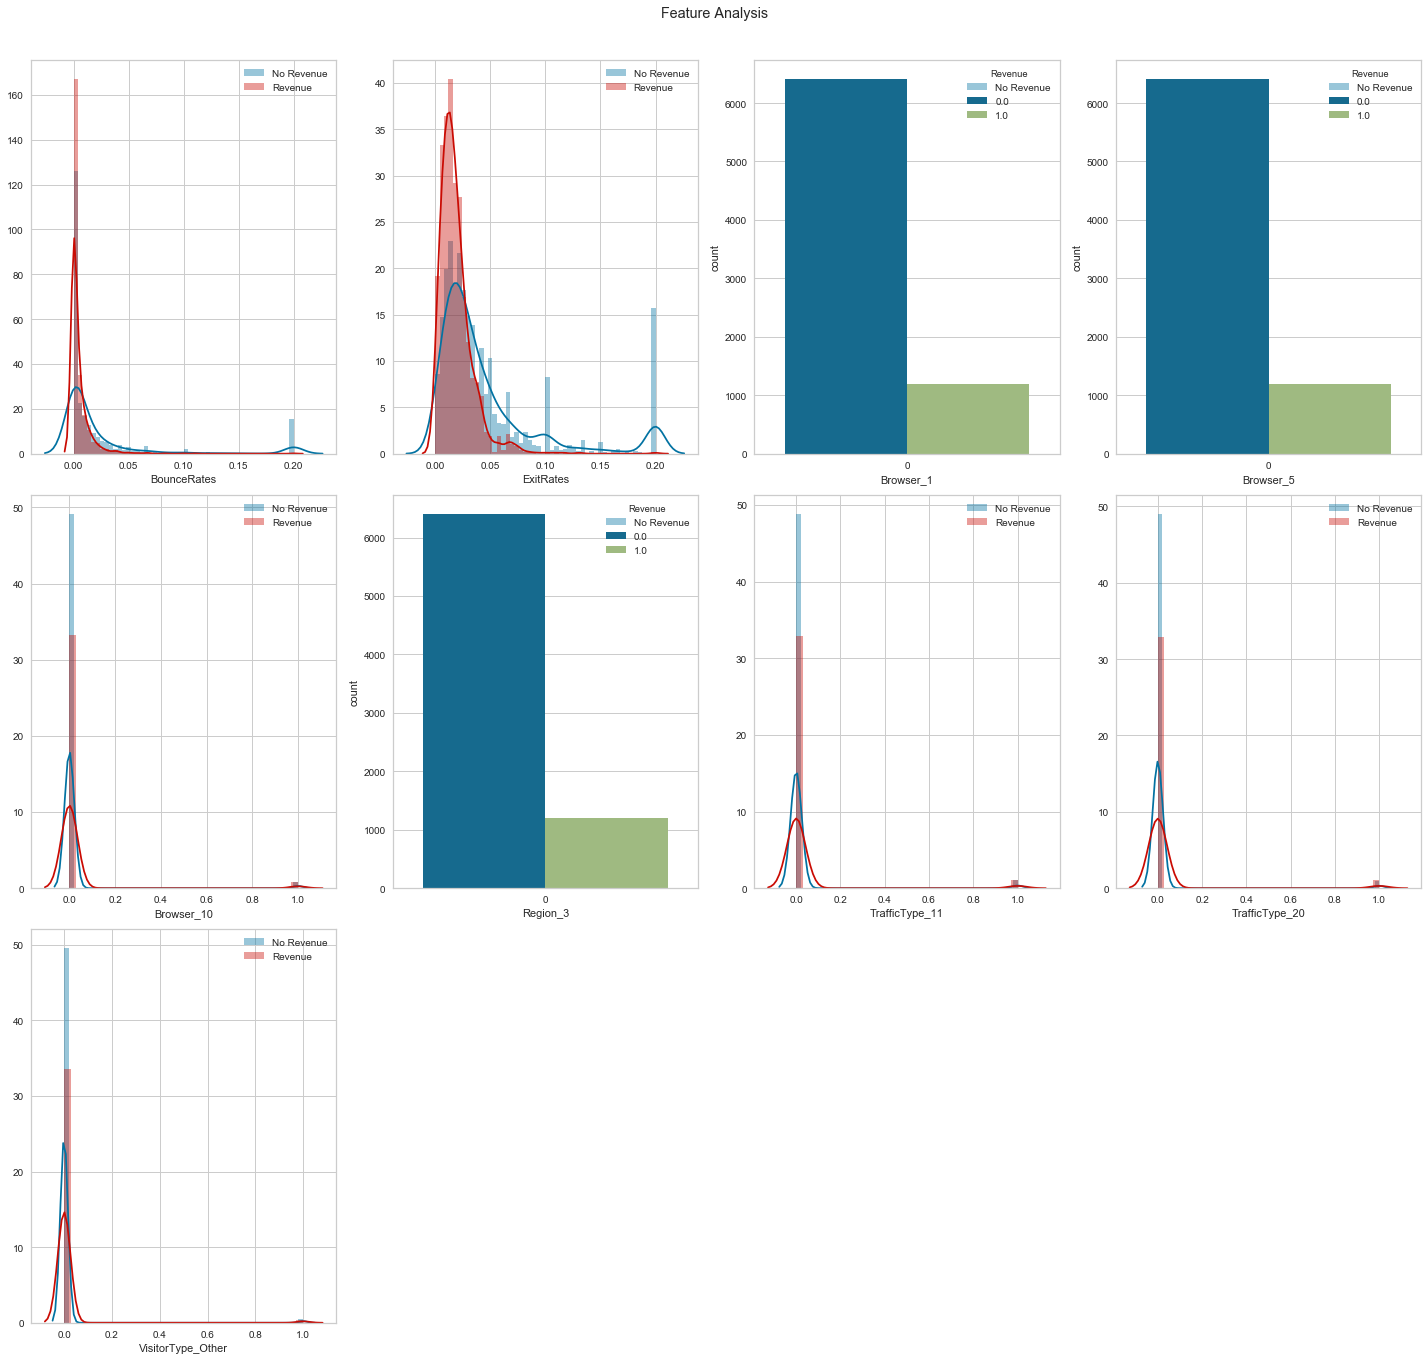

In [290]:
import seaborn as sns
# Next, to analyze composition of each cluster
#Cluster 0
result = X_save.loc[X_save['ClusterID'] == 0]

fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    if i != 10 and i!=9:
        plt.subplot(4, 4, j+1)
        j += 1
        try:
            sns.distplot(result[item][result['Revenue']==0], color='b', label = 'No Revenue')
            sns.distplot(result[item][result['Revenue']==1], color='r', label = 'Revenue')

        except:  
            sns.countplot(data=result, x = item,hue = "Revenue")
            print(i,item,"Single Value")
            continue
        plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

2 Browser_1 Single Value
3 Browser_5 Single Value
4 Browser_10 Single Value
5 Region_3 Single Value
8 VisitorType_Other Single Value


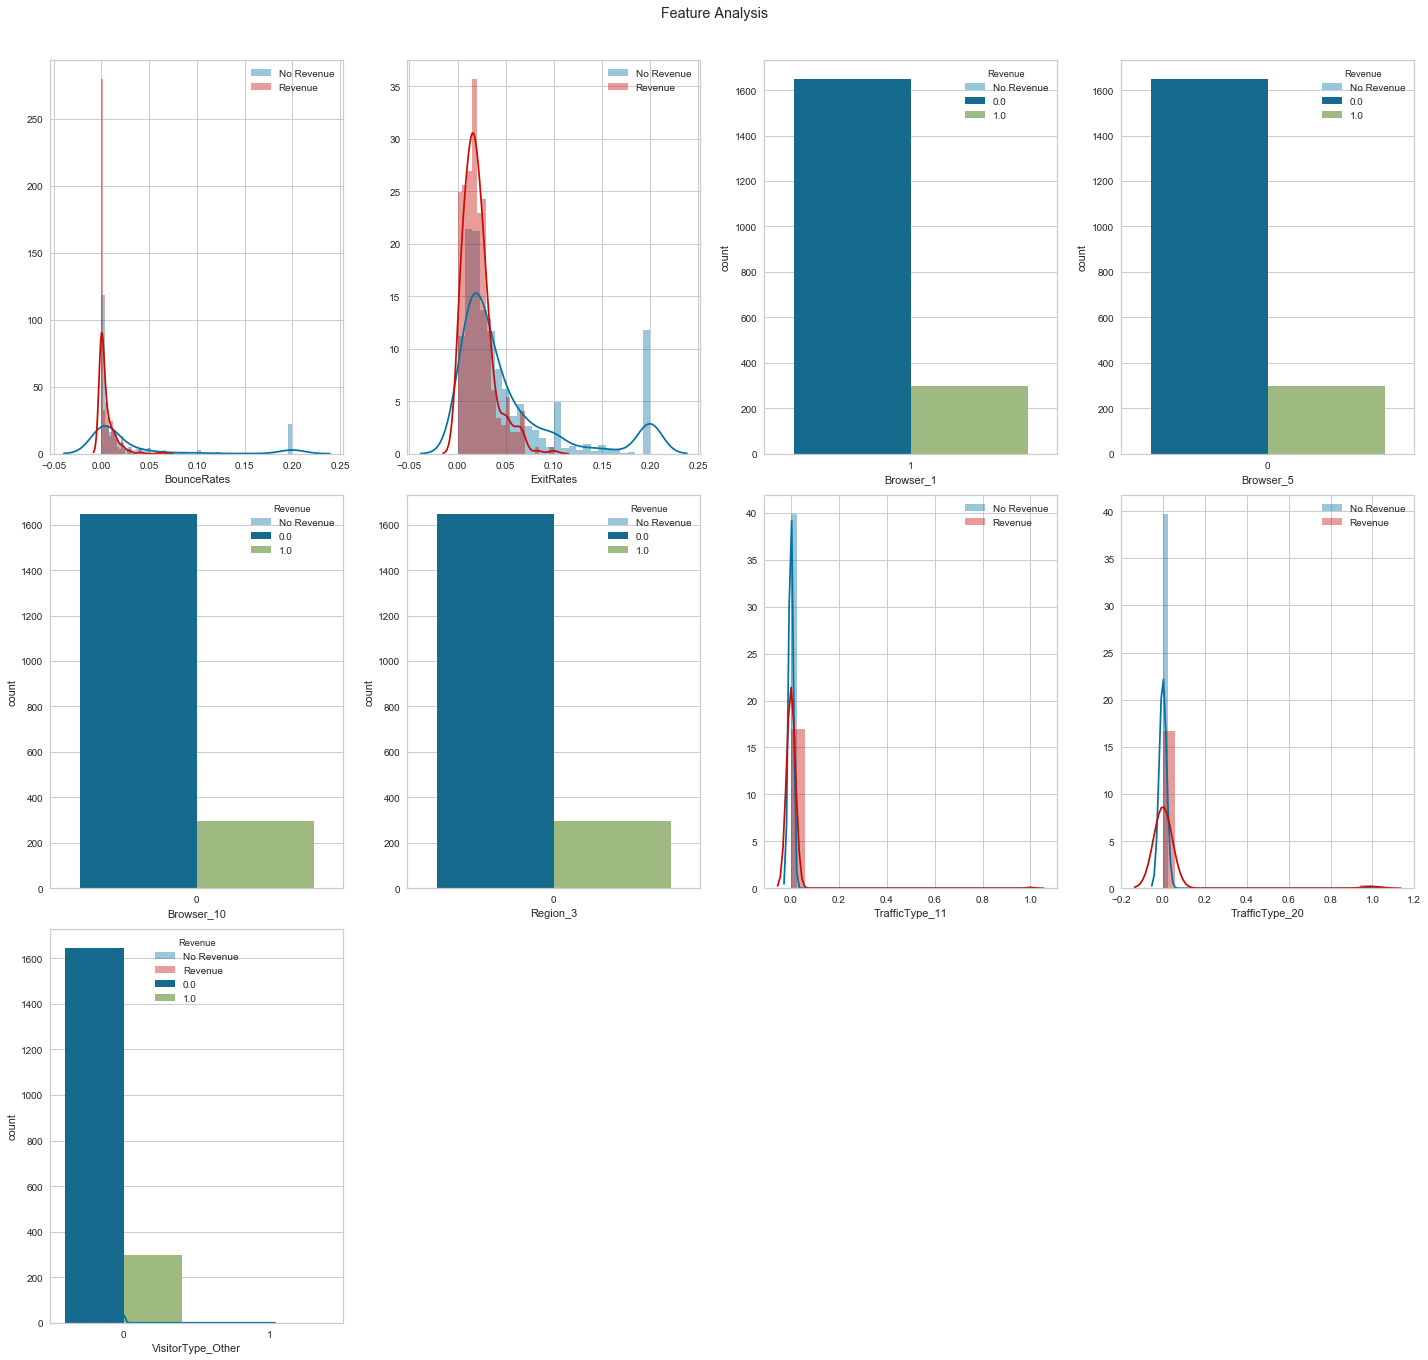

In [292]:
import seaborn as sns
# Next, to analyze composition of each cluster
#Cluster 1
result = X_save.loc[X_save['ClusterID'] == 1]

fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    if i != 10 and i!=9:
        plt.subplot(4, 4, j+1)
        j += 1
        try:
            sns.distplot(result[item][result['Revenue']==0], color='b', label = 'No Revenue')
            sns.distplot(result[item][result['Revenue']==1], color='r', label = 'Revenue')

        except:  
            sns.countplot(data=result, x = item,hue = "Revenue")
            print(i,item,"Single Value")
            continue
        plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

2 Browser_1 Single Value
3 Browser_5 Single Value
5 Region_3 Single Value
8 VisitorType_Other Single Value


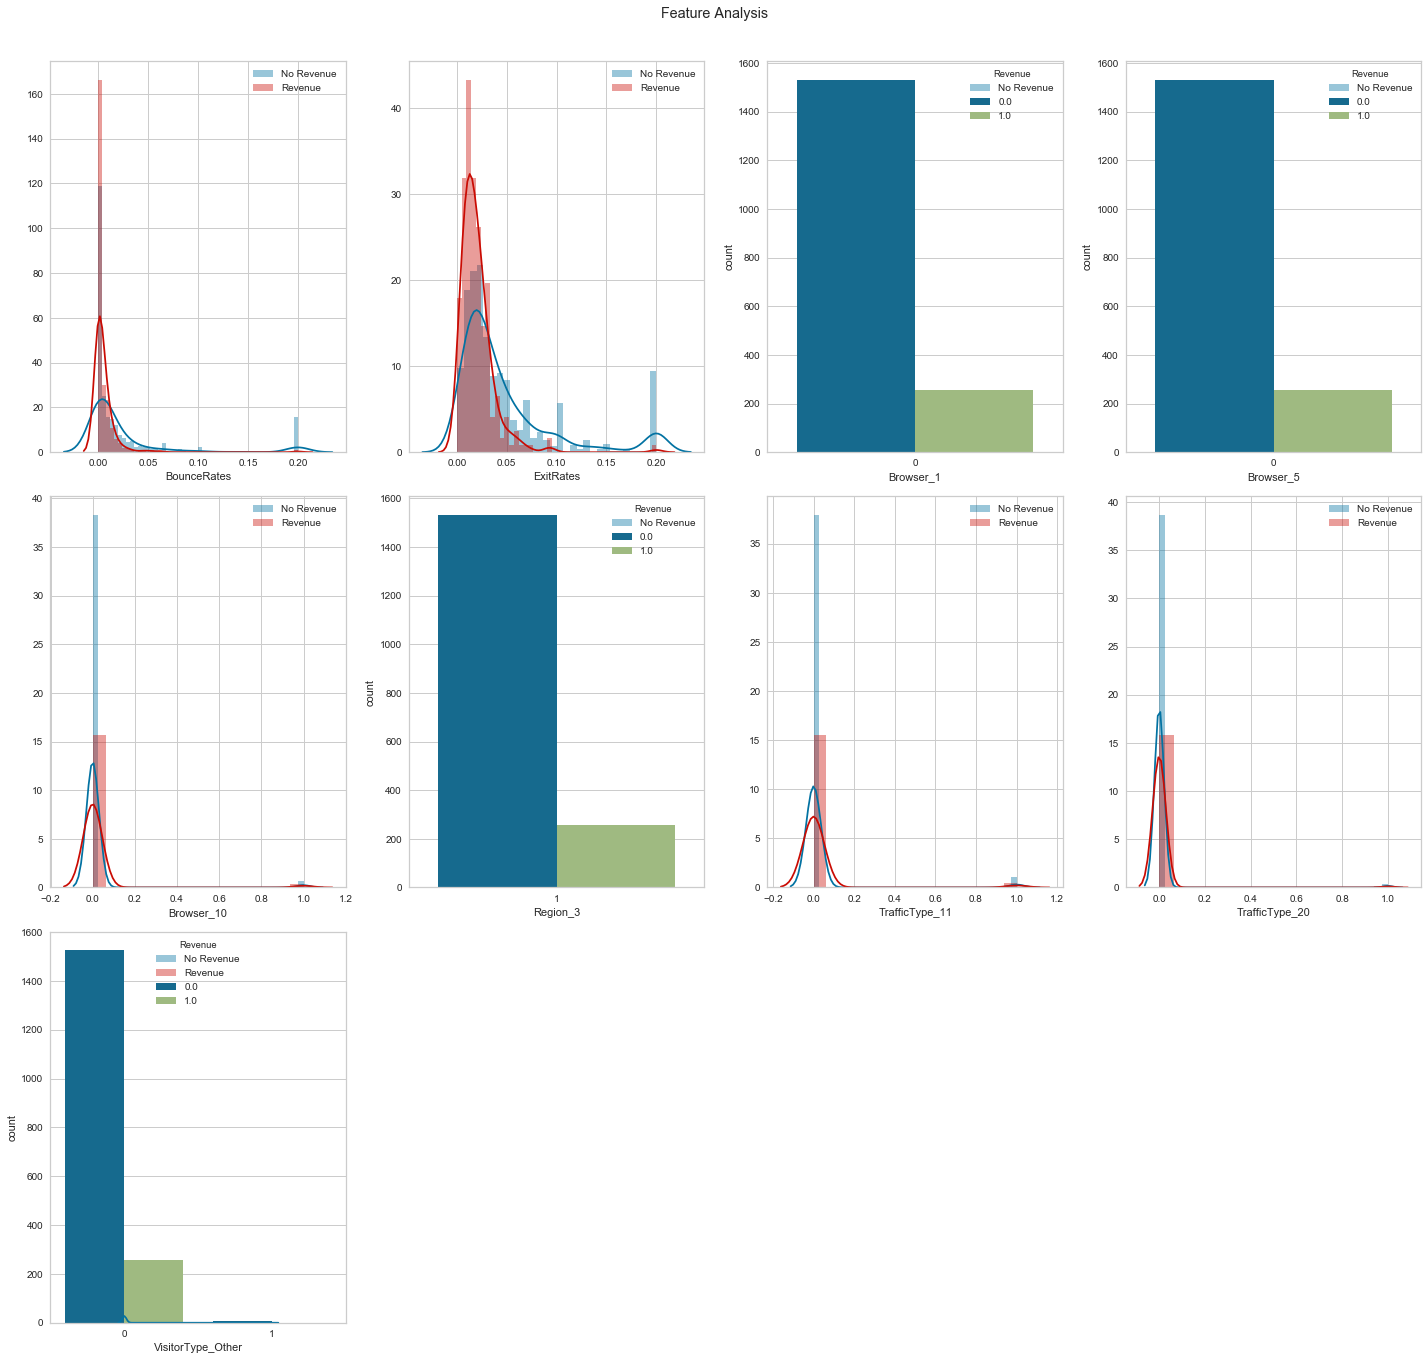

In [293]:
import seaborn as sns
# Next, to analyze composition of each cluster
#Cluster 2
result = X_save.loc[X_save['ClusterID'] == 2]

fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    if i != 10 and i!=9:
        plt.subplot(4, 4, j+1)
        j += 1
        try:
            sns.distplot(result[item][result['Revenue']==0], color='b', label = 'No Revenue')
            sns.distplot(result[item][result['Revenue']==1], color='r', label = 'Revenue')

        except:  
            sns.countplot(data=result, x = item,hue = "Revenue")
            print(i,item,"Single Value")
            continue
        plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

2 Browser_1 Single Value
3 Browser_5 Single Value
4 Browser_10 Single Value
5 Region_3 Single Value
6 TrafficType_11 Single Value
8 VisitorType_Other Single Value


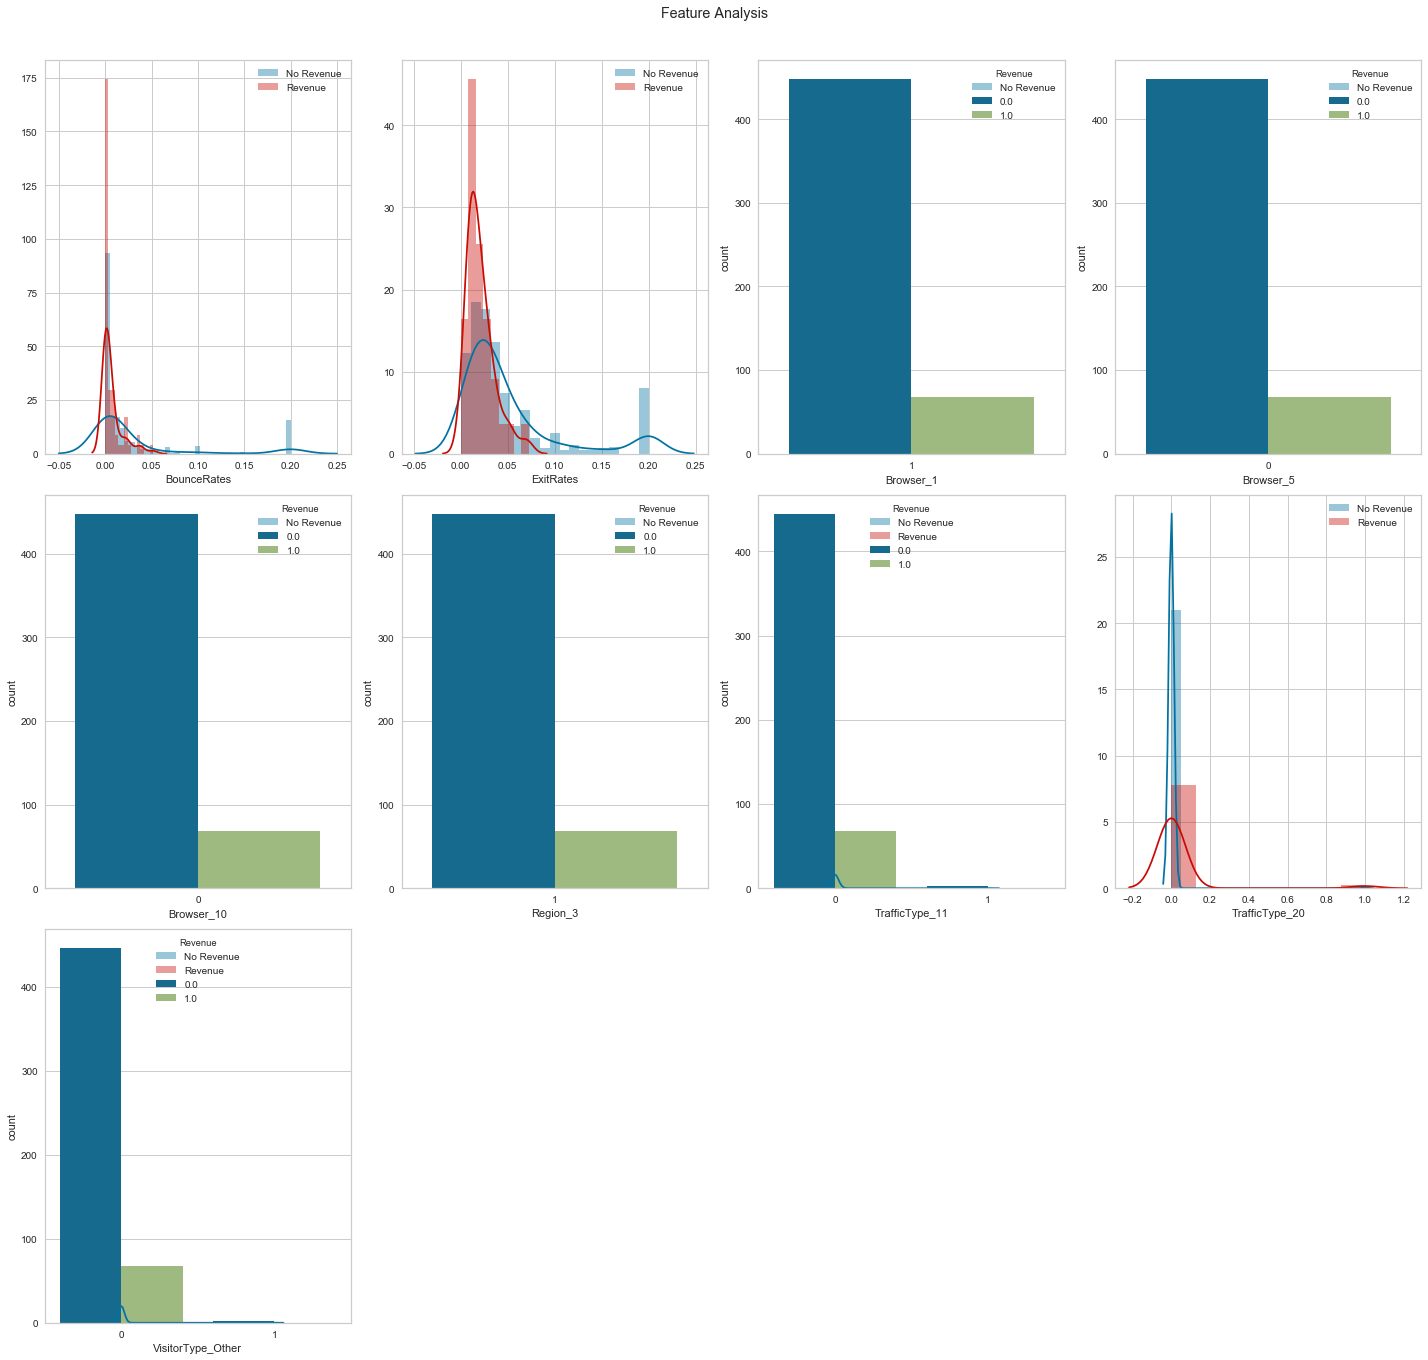

In [294]:
import seaborn as sns
# Next, to analyze composition of each cluster
#Cluster 3
result = X_save.loc[X_save['ClusterID'] == 3]

fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    if i != 10 and i!=9:
        plt.subplot(4, 4, j+1)
        j += 1
        try:
            sns.distplot(result[item][result['Revenue']==0], color='b', label = 'No Revenue')
            sns.distplot(result[item][result['Revenue']==1], color='r', label = 'Revenue')

        except:  
            sns.countplot(data=result, x = item,hue = "Revenue")
            print(i,item,"Single Value")
            continue
        plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

2 Browser_1 Single Value
3 Browser_5 Single Value
4 Browser_10 Single Value


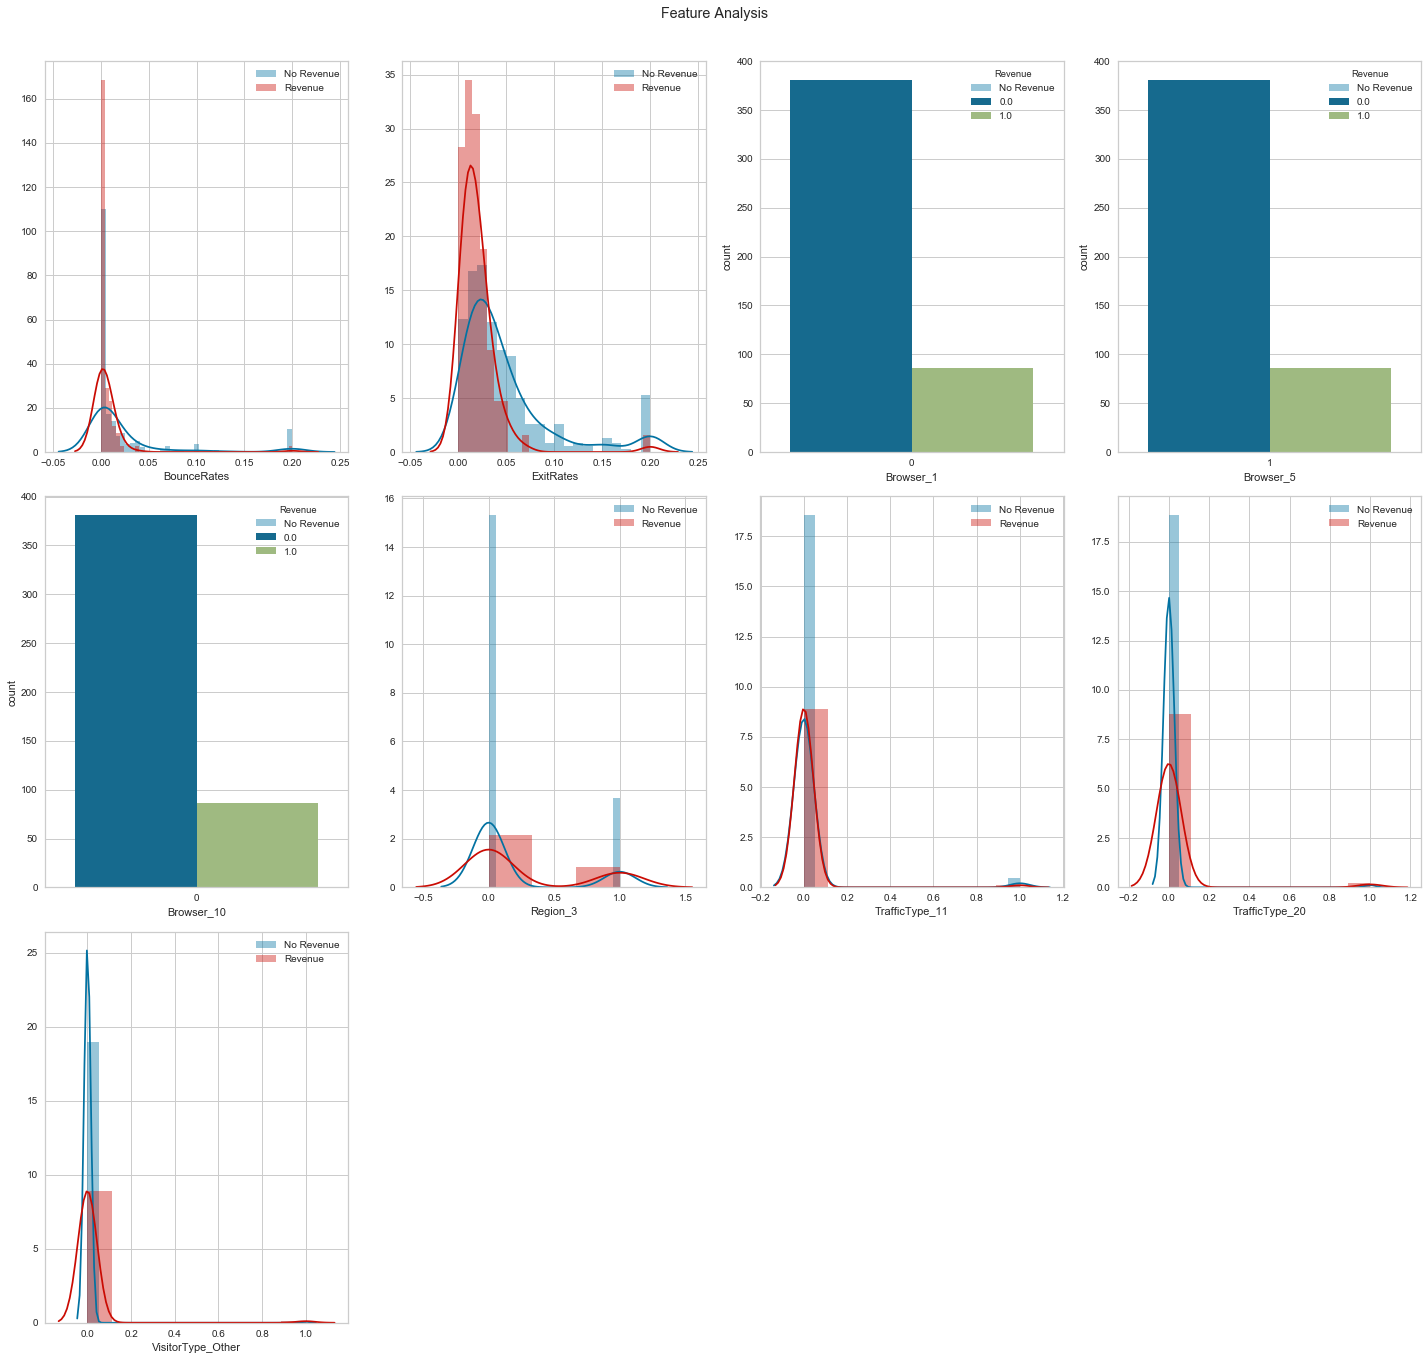

In [291]:
#Cluster 4
result = X_save.loc[X_save['ClusterID'] == 4]
fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    if i != 10 and i!=9:
        plt.subplot(4, 4, j+1)
        j += 1
        try:
            sb.distplot(result[item][result['Revenue']==0], color='b', label = 'No Revenue')
            sb.distplot(result[item][result['Revenue']==1], color='r', label = 'Revenue')

        except:  
            sns.countplot(data=result, x = item,hue = "Revenue")
            print(i,item,"Single Value")
            continue
        plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()




## Task 3: Consider you have training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing. Build a semi-supervised self labelling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit your classifier. Report classification performance on Feb-March data set with and without the self-labelled data. (25 points)
```
a. If you dont consider the records from Oct-Dec, generate the classification performance on Test data
b. After using the self labelled data and training data together, does the classification performance on 
Test data improve? Comment on which metrics are of importance here.
```

In [336]:
# Extract train from Jun - Sep and unlabel data from Oct - Dec
x_train = dataset[dataset["Month"].isin(["Jun", "Jul","Aug","Sep"])] 
x_unlabel =  dataset[dataset["Month"].isin(["Oct", "Nov","Dec"])] 
y_train = np.array(x_train["Revenue"].astype(int))
y_test_unlabel = np.array(x_unlabel["Revenue"].astype(int))
y_unlabel=np.empty([len(x_unlabel),])
y_unlabel.fill(-1)

# Drop month and revenue 
x_train=x_train.drop(columns = ["Month","Revenue"])
x_unlabel=x_unlabel.drop(columns = ["Month","Revenue"])


In [343]:
# Extract test data from February and March
x_test = dataset[dataset["Month"].isin(["Feb", "Mar"])] 
y_test = np.array(x_test["Revenue"].astype(int))
x_test = x_test.drop(columns = ["Month","Revenue"])

## Without self-labelled data

In [346]:
# build and fit a knn model w n_neighbots = 5. 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

In [347]:
# predict test data
y_pred_knn = knn_model.predict(x_test)

In [348]:
# Evaluate knn model with test data
cm   = confusion_matrix(y_test, y_pred_knn) 
acc  = accuracy(y_test, y_pred_knn)
rec = recall(y_test, y_pred_knn)
prec = precision(y_test, y_pred_knn)
f1   = f1_score(y_test, y_pred_knn)

print('Model')
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)

Model
Accuracy = 0.9091343854615017, Precision = 0.543859649122807, Recall = 0.15897435897435896, F1-score = 0.24603174603174605
Confusion Matrix is:
[[1870   26]
 [ 164   31]]


## With self-labelled data

In [337]:
# Append train and unlabel data in X
X = np.array(x_train.append(x_unlabel))
print(X.shape[0])
print(x_train.shape[0])
print(x_unlabel.shape[0])

6587
1313
5274


In [338]:
# Append train and unlabel data in y
y = np.concatenate((y_train, y_unlabel),axis = 0)
print(y.shape)

(6587,)


In [339]:
# Label propagation to predict unlabeled data
from sklearn.semi_supervised import LabelSpreading
lp_model = LabelSpreading(kernel = 'knn', alpha = 0.01, n_neighbors = 5).fit(X, y)

/Users/daisyhe/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


In [340]:
# Extract predicted label: train data ends at 1313
preds = lp_model.transduction_[1313:]

In [341]:
# Evaluate model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
## N neighbour = 5
cm   = confusion_matrix(y_test_unlabel, preds) 
acc  = accuracy(y_test_unlabel, preds)
rec = recall(y_test_unlabel,preds)
prec = precision(y_test_unlabel, preds)
f1   = f1_score(y_test_unlabel, preds)

print('Model')
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)


Model
Accuracy = 0.7777777777777778, Precision = 0.4370139968895801, Recall = 0.25756186984417967, F1-score = 0.32410611303344866
Confusion Matrix is:
[[3821  362]
 [ 810  281]]


In [344]:
# Predict revenue with the new model using the test daya
y_pred = lp_model.predict(x_test)

In [345]:
# Evaluate new model with test data
cm   = confusion_matrix(y_test, y_pred) 
acc  = accuracy(y_test, y_pred)
rec = recall(y_test, y_pred)
prec = precision(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print('Model')
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)

Model
Accuracy = 0.890961262553802, Precision = 0.36363636363636365, Recall = 0.22564102564102564, F1-score = 0.27848101265822783
Confusion Matrix is:
[[1819   77]
 [ 151   44]]
